### 시계열 자료분석 HW02 - 5번
### 201822037 통계학과 한민주

#### (0) ${Z_t}$ 생성

In [ ]:
#@title
set.seed(201822037)
Z = 10  ## Z_0 = 10
e = rnorm(100,0,1) # e_t ~ N(0,1)

for(i in 2:101){
    Z[i] = 1 + 0.9*Z[i-1] +e[i-1]
    }

Z = Z[2:101] # t = 1,2, ... , 100
Z = ts(Z)
Z

A Time Series:
  [1]  9.237181 10.692884 12.369255 13.858786 14.630949 14.023579 12.327489
  [8] 11.883854 13.678990 12.993584 12.032856 11.998476 12.820904 12.371130
 [15] 12.147382 11.989492 11.537633 12.086634 12.010193 12.804693 12.629778
 [22] 11.893448 11.314012 12.291473 11.041728 11.391311 11.204298 13.220825
 [29] 13.716244 15.296429 13.371324 13.608153 11.912497 11.413639 10.995854
 [36]  9.395276  9.569312 10.350464 11.412304 11.751236 11.226291 11.648559
 [43] 12.769418 12.406570 12.554876 11.408626 12.319381 12.218173 11.537290
 [50]  9.656723 10.215309  7.305363  6.314311  7.674967  8.798453  8.826746
 [57]  8.242927  9.112010 10.871802  8.229197 10.372504 10.957543  9.785780
 [64] 10.019215 10.018458 10.142068 10.833094 11.681613 13.079888 13.006475
 [71] 11.830278 11.096614 11.815936 12.614662 10.162070  9.804590  9.270280
 [78]  7.571987  8.080469  9.061902 10.149699  9.536287  8.471005  9.716541
 [85]  9.611799  8.071191  7.628086  9.103153 10.434822  9.712023 10.600326
 [92] 10.905467 11.461104 11.861031 12.090721 11.163198 12.181131 11.563812
 [99]  9.903857  9.995878

#### (1) ${Z_t}$의 시계열 그림 그려라.

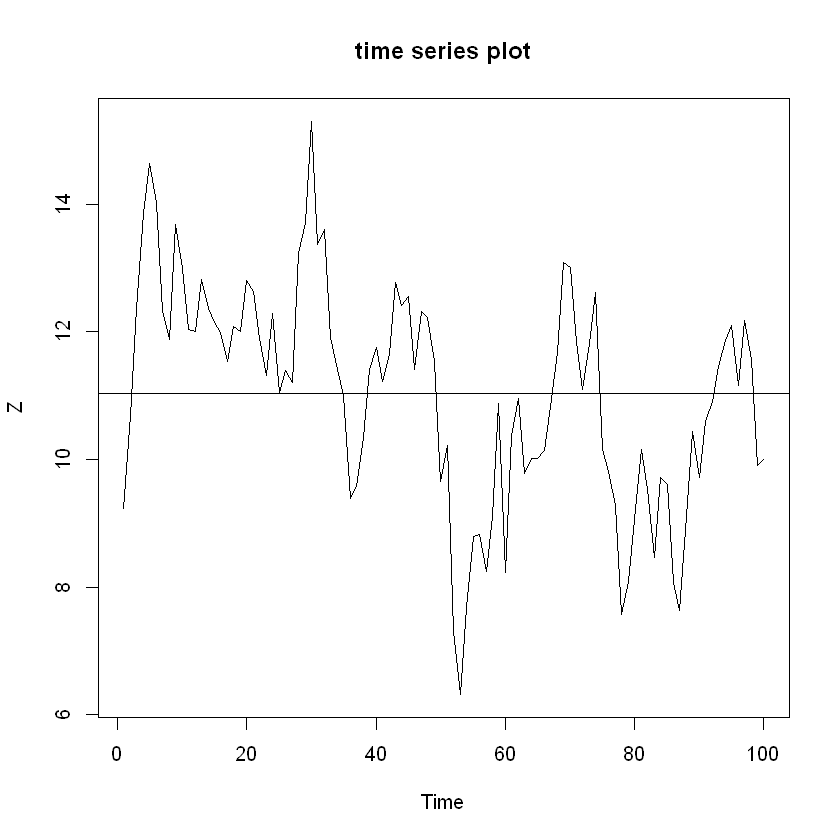

In [ ]:
#@title
plot(Z, main = "time series plot")
abline(h = mean(Z))

- 11을 중심으로 왔다갔다하는 것처럼 보인다.
- 추세, 계절성, 이분산성이 없어 보인다.

#### (2) SACF $\hat{\rho_h} , h=1,2, .. , 10$을 구하여 표본상관도표를 그려라.

[1] 0.80491606 0.62698977 0.50786573 0.40212360 0.26869866 0.18473026
 [7] 0.14133928 0.11879735 0.07229438 0.09470670

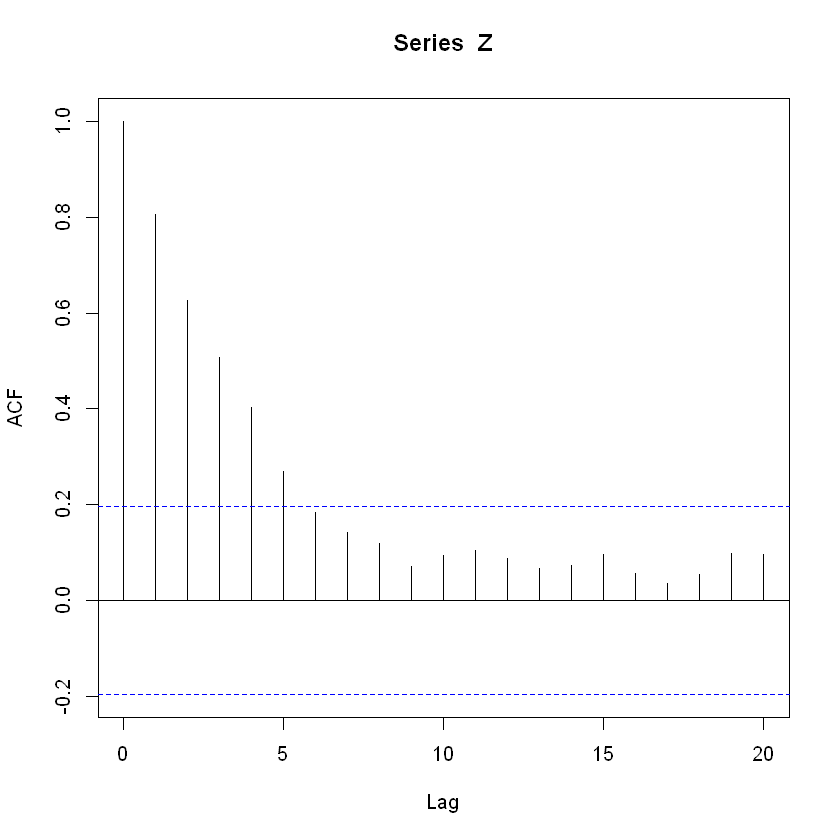

In [ ]:
#@title
r = acf(Z)
r$acf[2:11] 

- $\hat{\rho_0}$ 의 값은 항상 1인데, 시차가 0인 $Z_t$ 자신들끼리의 자기상관계수이기 때문이다.
- ${Z_t}$는 1차 자기회귀과정인데, 회귀계수 $\phi$가 양수인 0.9이므로 한쪽방향에 한동안 머무르는 모양을 띈다.
- 회귀계수 $\phi= 0.9$이므로 $\hat{\rho_1}$ 도 0.9와 비슷한 값이 나온다.
- 시차가 커질수록 $\hat{\rho_h}$는 줄어드는 점점 줄어들고 있다. 이는 현재와 먼 시점의 데이터일수록 현재의 데이터에 더 작은 영향을 줄 것이라는 시계열data의 기본 가정 때문이다.
- $\hat{\rho_h}, h=6,7,...$ 인 경우는 자기상관관계가 없다고 볼 수 있다.
- 파란선은 $\frac{2}{\sqrt{100}}=0.2$인데, $H_0: \rho_h=0   vs. H_1: \rho_h \neq 0$ 검정에서 |$\hat{\rho_h}$ | < $\frac{2}{\sqrt{n}}$이면 영가설을 기각할 수 없기 때문이다. 

#### (3) SPACF $\hat{\phi_h} , h=1,2, .. , 10$을 구하여 표본상관도표를 그려라.

[1]  0.80491606 -0.05935667  0.05988822 -0.03348384 -0.13470373  0.04721257
 [7]  0.03063568  0.03921720 -0.06705705  0.15545015

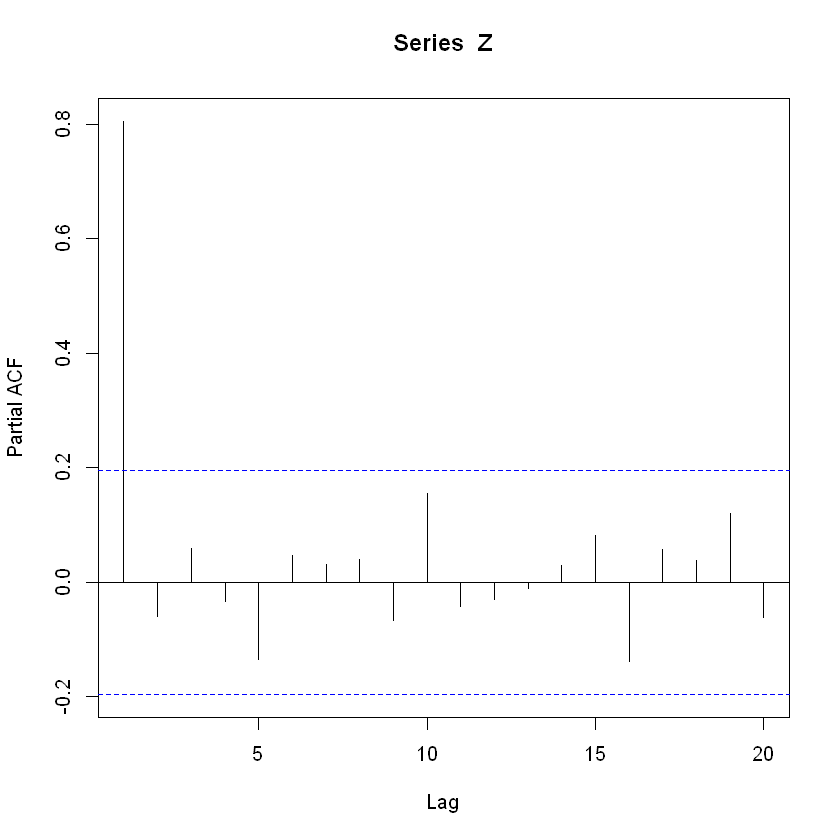

In [ ]:
#@title
phi = pacf(Z)
phi$acf[1:10]

- ${Z_t}$는 1차 자기회귀과정이고, 회귀계수 $\phi$가 양수인 0.9이므로 SPACF값이 $\hat{\phi_{11}}$만 유의하고 나머지는 유의하지 않다.
- 회귀계수 $\phi$가 0.9이므로 $\hat{\phi_{11}}$이 0.9에 가까운 값이 나온다.
- $\hat{\phi_{11}} = \hat{\rho_1}$이다.
- $\hat{\phi_{22}}$는 $Z_t$ 와 $Z_{t+2}$ 사이의 $Z_{t+1}$ 효과를 제거한 후 2시차만큼 떨어진 $Z_t$와 $Z_{t+2}$의 순수한 상관계수를 의미한다.

=> SACF 도표와 SPACF 도표를 보고 시계열 자료가 어느 확률과정의 모형으로부터 생성된 것인지 특정할 수 있으므로 두 도표 분석은 시계열자료의 모형식별에 중요한 역할을 한다.

#### (4) {$Z_t , Z_{t-1}$}의 산점도를 그리고, 이 산점도와 $\hat{\rho_1}$의 관계를 설명하라. 

In [ ]:
#@title
Z_1 = c(10 , Z[1:99])
print("Z(t):")
head(Z)

[1] "Z(t):"


[1]  9.237181 10.692884 12.369255 13.858786 14.630949 14.023579

In [ ]:
#@title
print(paste("Z(t-1):"))
head(Z_1)

[1] "Z(t-1):"


[1] 10.000000  9.237181 10.692884 12.369255 13.858786 14.630949

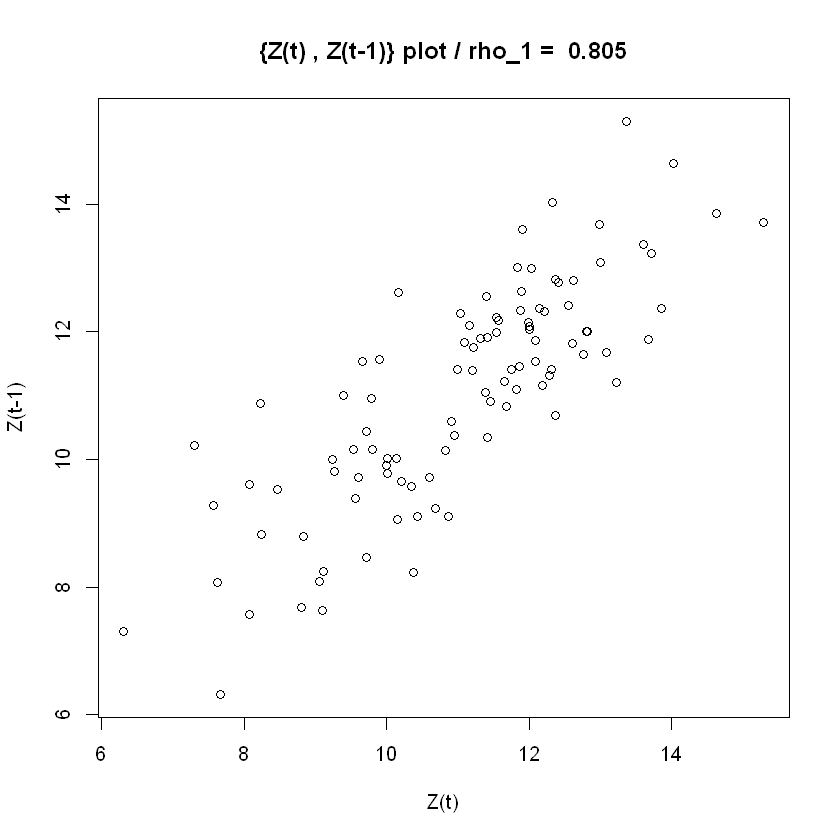

In [ ]:
#@title
plot(as.vector(Z) , as.vector(Z_1) , 
    xlab = "Z(t)" , ylab = "Z(t-1)" , main = paste("{Z(t) , Z(t-1)} plot /",
                                                   "rho_1 = ",  round(r$acf[2],3)))

-  $Z_t$와 $Z_{t-1}$의 시차는 1이고, $\hat{\rho_1}$은 시차가 1인 $Z_t$ 사이의 표본자기상관계수이다.
- 앞서 구한 $\hat{\rho_1}$= 0.8 이었으므로 {$Z_t$, $Z_{t-1}$}의 산점도는 우상향하고 있으며 상당히 상관이 커보이는 산점도가 그려진다.
- $\hat{\rho_1}$는 {$Z_t , Z_{t-1}$} 산점도에서 직선관계의 정도를 의미한다.

#### (5) {$Z_t , Z_{t-2}$}의 산점도를 그리고, 이 산점도와 $\hat{\rho_2}$의 관계를 설명하라. 

In [ ]:
#@title
Z_2 = c(NA , 10 , Z[1:98])
print("Z(t):")
head(Z)

[1] "Z(t):"


[1]  9.237181 10.692884 12.369255 13.858786 14.630949 14.023579

In [ ]:
#@title
print(paste("Z(t-2):"))
head(Z_2)

[1] "Z(t-2):"


[1]        NA 10.000000  9.237181 10.692884 12.369255 13.858786

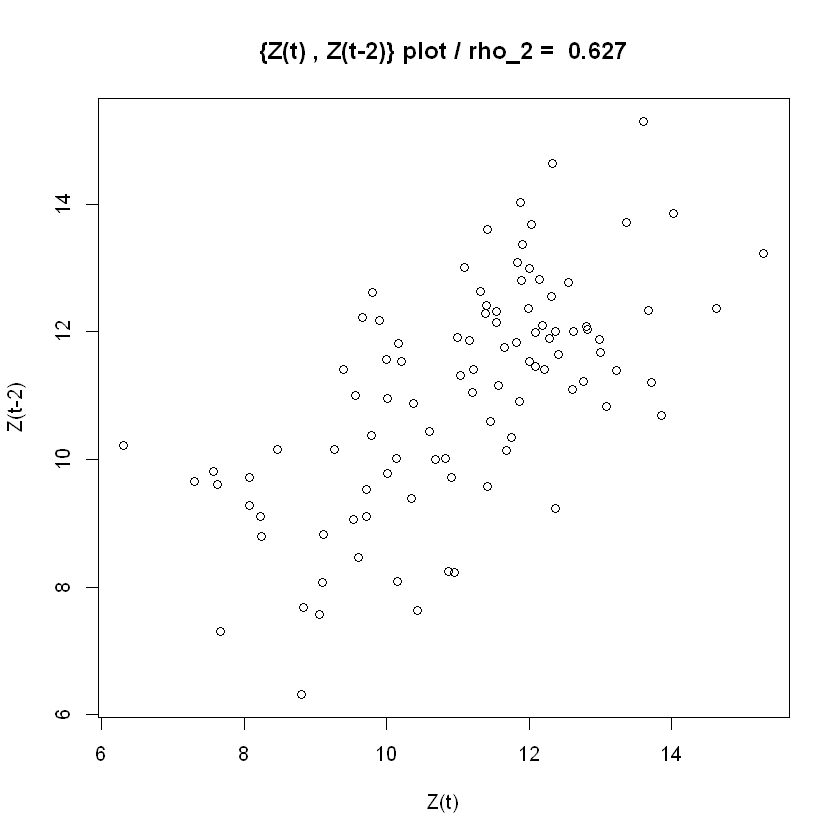

In [ ]:
#@title
plot(as.vector(Z) , as.vector(Z_2) , 
    xlab = "Z(t)" , ylab = "Z(t-2)" , main = paste("{Z(t) , Z(t-2)} plot /",
                                                   "rho_2 = ",  round(r$acf[3],3)))

-  $Z_t$와 $Z_{t-2}$의 시차는 2이고, $\hat{\rho_2}$은 시차가 2인 $Z_t$ 사이의 표본자기상관계수이다.
- 앞서 구한 $\hat{\rho_2}$= 0.627 이었으므로 {$Z_t$, $Z_{t-2}$}의 산점도는 우상향하고 있으나 시차 1의 산점도보다는 점들이 흩어져 있어보이는 산점도가 그려진다.
- $\hat{\rho_2}$는 {$Z_t , Z_{t-2}$} 산점도에서 직선관계의 정도를 의미한다.